In [30]:
import numpy as np
from qiskit import *
from qiskit import BasicAer
from qiskit_ibm_provider import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor  
from qiskit import QuantumCircuit as QC


C:\Users\jairo\AppData\Local\Temp\ipykernel_5684\584994881.py:3: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer


In [31]:
def oracle(case, n):
    ##creating an oracle
    oracle_qc = QC(n+1)
    if case=="balanced":
        for i in range(n):
            oracle_qc.cx(i,n)
    if case=="constant":
        pass
    
    ##converting circuit to a indivsual gate
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = " Oracle "
    
    return oracle_gate        

In [32]:
def dj_algorithm(n, case='random'):
    dj_circuit= QuantumCircuit(n+1,n)
    for i in range(n):
        dj_circuit.h(i)
    dj_circuit.x(n)
    dj_circuit.h(n)
    if case=="random":
        rnd = np.random.randint(2)
        if rnd == 0:
            case = "constant"
        else:
            case = "balanced"
    dj_oracle = oracle(case, n)
    dj_circuit.append(dj_oracle, range(n+1))
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i,i)
    
    return dj_circuit 

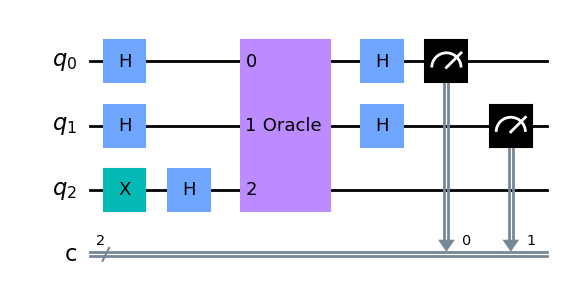

In [33]:
n = 2
dj_crc = dj_algorithm(n)
dj_crc.draw('mpl')

C:\Users\jairo\AppData\Local\Temp\ipykernel_5684\2435618561.py:4: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  results = execute(dj_circuit, backend=backend, shots=shots).result()


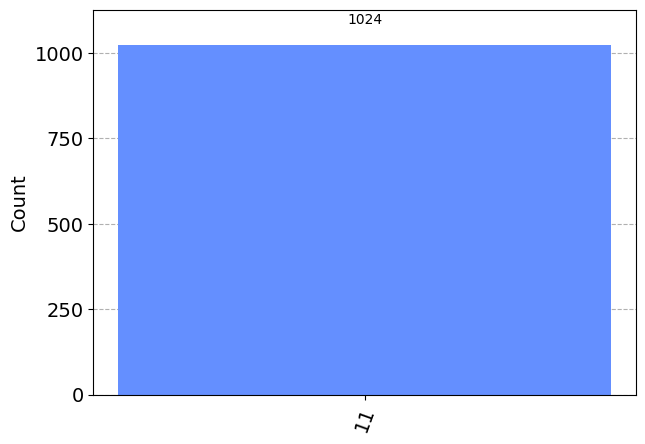

In [34]:
backend=BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n, "balanced")
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [35]:
from qiskit_ibm_provider import IBMProvider

In [36]:
ibm_token="#"
IBMProvider.save_account(ibm_token,overwrite=True)

In [37]:
provider=IBMProvider()
backends = provider.backends()
print(backends)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_kyiv')>]


In [38]:
from qiskit_ibm_provider import least_busy

C:\Users\jairo\AppData\Local\Temp\ipykernel_5684\1557067887.py:5: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)


Job Status: job has successfully run


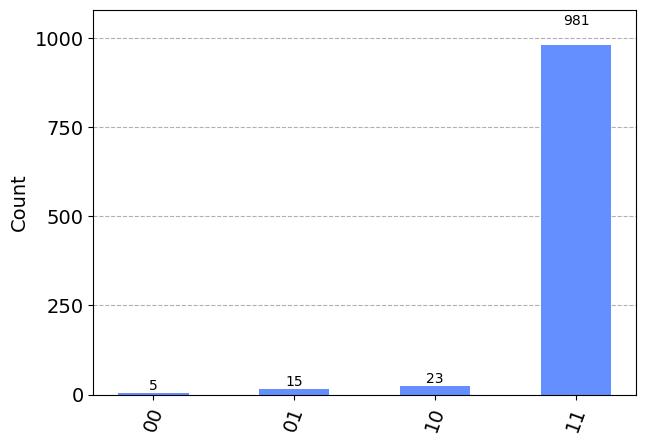

In [39]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                      not x.configuration().simulator and x.status().operational == True))
from qiskit.tools.monitor import job_monitor
dj_circuit = dj_algorithm(n, "balanced")
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)
job_monitor(job)
result = job.result()
answer = result.get_counts()
plot_histogram(answer)